In [2]:
import tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [3]:
f50 = np.load("f50.npy")
f100 = np.load("f100.npy")
f150 = np.load("f150.npy")
f200 = np.load("f200.npy")
f50_100 = np.load("f50_100.npy")

In [4]:
f50_100_target = []
for i in range(100):
    for j in range(1000):
        zero_um = (0,1)
        f50_100_target.append(zero_um)

for i in range(100):
    for j in range(1000):
        um_zero = (1,0)
        f50_100_target.append(um_zero)

In [4]:
# f50_100_target

In [5]:
X = np.reshape(f50_100, (200000, 1, 1))
y = np.array(f50_100_target)

In [17]:
X.shape

(200000, 1, 1)

In [92]:
f_test = np.concatenate((f50[0], f100[0]))

In [95]:
f_test.size

2000

In [127]:
f_target = []
for j in range(1000):
    zero_um = (0,1)
    f_target.append(zero_um)

for j in range(1000):
    um_zero = (1,0)
    f_target.append(um_zero)
    
f_target = np.array(f_target)

In [128]:
np.sum(f_target,axis=1)

array([1, 1, 1, ..., 1, 1, 1])

In [137]:
su_01=sum([i[0] for i in f_target])
su_10=sum([i[1] for i in f_target])
print (su_01)
print (su_10)

1000
1000


In [97]:
f_test

array([0.34744393, 0.33874101, 0.330009  , ..., 0.41109657, 0.3941345 ,
       0.3770371 ])

In [147]:
f_test_5 = np.array([f_test, f_test, f_test, f_test, f_test])
f_target_5 = np.array([f_target, f_target, f_target, f_target, f_target])

In [151]:
f_test_5.shape

(5, 2000)

In [150]:
f_target_5.shape

(5, 2000, 2)

In [160]:
X = np.reshape(f_test_5, (5, 2000, 1))
y = np.array(f_target_5)

In [157]:
X.shape

(5, 2000, 1)

In [158]:
y.shape

(5, 2000, 2)

In [20]:
X = np.reshape(f50_100, (200000, 1, 1))
y = np.array(f50_100_target)

In [6]:
import math
n_input_layer = 1000
n_output_layer = 1
n_hidden_layer = round(math.sqrt((n_input_layer*n_output_layer)))
print("nro de neurônios na hidden layer:", n_hidden_layer)

nro de neurônios na hidden layer: 32


In [7]:
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [8]:
model=Sequential()
model.add(SimpleRNN(n_hidden_layer, 
                    input_shape=(None,1), 
                    kernel_initializer='random_normal',
                    stateful = True,
                    batch_size = 1
                    ))
model.add(Dense(2, activation='softmax'))
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (1, 32)                   1088      
_________________________________________________________________
dense_1 (Dense)              (1, 2)                    66        
Total params: 1,154
Trainable params: 1,154
Non-trainable params: 0
_________________________________________________________________


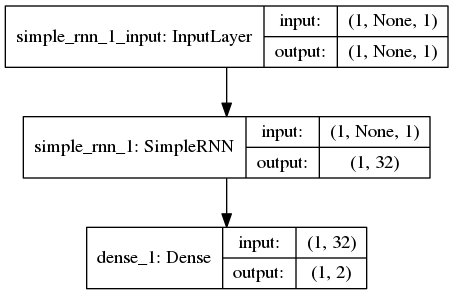

In [9]:
from keras.utils.vis_utils import plot_model
import graphviz
from interface import implements, Interface
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [19]:
%%time
history = model.fit(X, y, epochs = 5, batch_size = 1)

ValueError: Error when checking input: expected simple_rnn_1_input to have 3 dimensions, but got array with shape (200000, 1)

In [141]:
# list all data in history
print(history.history.keys())

dict_keys(['loss'])


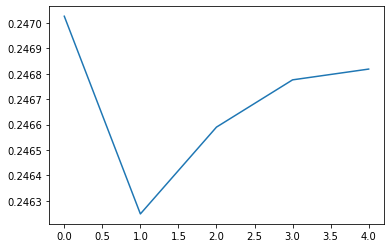

In [142]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['accuracy'], label='test')

In [15]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [16]:
pi = 3.1415
N = 1000
t = np.arange(0,N)
f = 100

In [17]:
qtd_amostras = 20
test = []
test_target = []

f = 50
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1)) 
    test_target.append(zero_um)
    test.append(x)
    
f = 100
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1))    
    test_target.append(um_zero)
    test.append(x)
    
test = np.reshape(test, (40, 1000, 1))

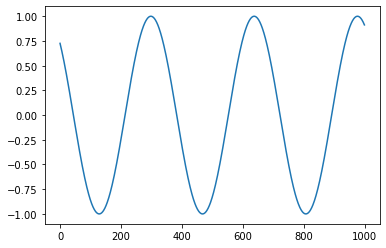

In [18]:
plt.plot(test[20])

In [19]:
test[20][0]

array([0.72571769])

In [20]:
hist = []
a = []
b = []
for i in range(1000):
    rs = np.reshape(f50_100[0][i], (1,1,1))
    predictions = model.predict(rs)
    a.append(predictions[0][0])
    b.append(predictions[0][1])
    print(predictions)

[[0.6617731  0.33822688]]
[[0.70202476 0.29797524]]
[[0.6912589  0.30874112]]
[[0.70168984 0.29831016]]
[[0.6909892  0.30901077]]
[[0.70177644 0.29822353]]
[[0.69095427 0.30904567]]
[[0.7017766 0.2982234]]
[[0.6909336  0.30906636]]
[[0.7017409  0.29825905]]
[[0.6908996  0.30910033]]
[[0.7016681  0.29833192]]
[[0.6908423  0.30915767]]
[[0.7015494  0.29845056]]
[[0.6907503  0.30924964]]
[[0.7013721  0.29862794]]
[[0.6906077  0.30939227]]
[[0.7011168 0.2988832]]
[[0.6903912  0.30960876]]
[[0.7007546  0.29924536]]
[[0.6900665  0.30993348]]
[[0.7002387  0.29976133]]
[[0.68958104 0.3104189 ]]
[[0.69948846 0.30051148]]
[[0.6888498  0.31115016]]
[[0.69835305 0.30164692]]
[[0.68772364 0.31227633]]
[[0.6965168  0.30348316]]
[[0.6859169  0.31408307]]
[[0.69323516 0.3067648 ]]
[[0.6828637 0.3171362]]
[[0.6866388  0.31336126]]
[[0.6778226  0.32217732]]
[[0.6737499  0.32625002]]
[[0.67197233 0.3280277 ]]
[[0.6596915 0.3403085]]
[[0.66837543 0.33162454]]
[[0.65488696 0.34511304]]
[[0.6671797  0.33282

[[0.59721494 0.40278503]]
[[0.628275 0.371725]]
[[0.47807172 0.52192825]]
[[0.5032596  0.49674028]]
[[0.6578487 0.3421514]]
[[0.6463826  0.35361752]]
[[0.6299133  0.37008667]]
[[0.54071623 0.45928374]]
[[0.52381724 0.47618276]]
[[0.5534036 0.4465964]]
[[0.5873104 0.4126897]]
[[0.5664889 0.4335111]]
[[0.5703465 0.4296535]]
[[0.5657226  0.43427736]]
[[0.62244433 0.37755576]]
[[0.6168671  0.38313296]]
[[0.59776783 0.40223217]]
[[0.6361017 0.3638983]]
[[0.6353939  0.36460605]]
[[0.6357237 0.3642762]]
[[0.6568925  0.34310758]]
[[0.6529596  0.34704036]]
[[0.5593521 0.4406478]]
[[0.6213294 0.3786706]]
[[0.6545922  0.34540778]]
[[0.65288544 0.34711462]]
[[0.627468   0.37253204]]
[[0.5835783  0.41642162]]
[[0.6197083 0.3802916]]
[[0.61101484 0.3889852 ]]
[[0.6749102 0.3250898]]
[[0.6683842  0.33161587]]
[[0.6736442  0.32635587]]
[[0.62811273 0.37188715]]
[[0.6594431  0.34055695]]
[[0.6495059  0.35049406]]
[[0.5879568 0.4120431]]
[[0.645805   0.35419503]]
[[0.65723217 0.3427679 ]]
[[0.6888713 0.

[[0.37055466 0.6294453 ]]
[[0.40397456 0.59602547]]
[[0.37579468 0.62420535]]
[[0.3863854 0.6136147]]
[[0.38103157 0.6189685 ]]
[[0.39480418 0.6051958 ]]
[[0.38499823 0.61500186]]
[[0.37108836 0.6289117 ]]
[[0.40456203 0.59543806]]
[[0.3779979 0.6220022]]
[[0.36035013 0.6396499 ]]
[[0.39758655 0.6024135 ]]
[[0.37154725 0.62845284]]
[[0.3632357 0.6367642]]
[[0.40657845 0.59342164]]
[[0.39458868 0.6054114 ]]
[[0.3521408 0.6478592]]
[[0.35287488 0.6471251 ]]
[[0.33934078 0.6606592 ]]
[[0.3645386 0.6354614]]
[[0.36903724 0.6309628 ]]
[[0.35932833 0.64067173]]
[[0.36167133 0.6383287 ]]
[[0.35466233 0.6453377 ]]
[[0.35544786 0.6445522 ]]
[[0.3523939 0.6476061]]
[[0.3468626 0.6531374]]
[[0.348289   0.65171105]]
[[0.34794068 0.6520594 ]]
[[0.34673744 0.6532626 ]]
[[0.34523514 0.6547649 ]]
[[0.3425778  0.65742224]]
[[0.34000474 0.6599953 ]]
[[0.3380562 0.6619438]]
[[0.33704484 0.66295516]]
[[0.3364272  0.66357285]]
[[0.3356107 0.6643894]]
[[0.334555 0.665445]]
[[0.3333425  0.66665757]]
[[0.3321

In [60]:
#print(a)

In [51]:
y_test_target = np.array(f50_100_target)
test_target_arr = y_test_target.argmax(1)

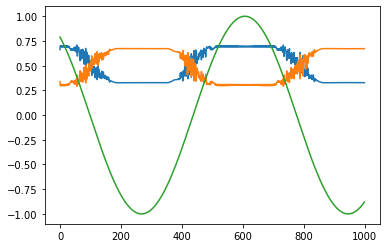

In [57]:
plt.plot(a)
plt.plot(b)
plt.plot(f50_100[0])
plt.plot(test_target_arr[0])
# plt.plot(f50_100_target[0])

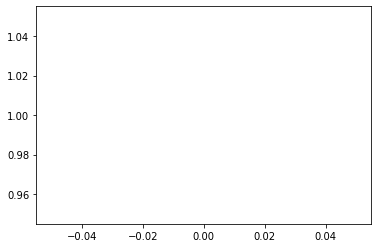

In [59]:
plt.plot(test_target_arr[0])

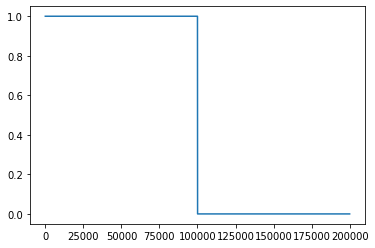

In [56]:
plt.plot(test_target_arr)

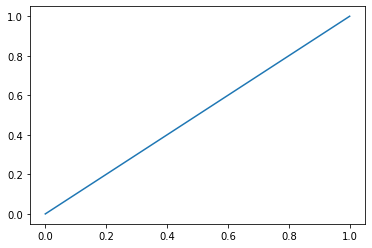

In [23]:
plt.plot(f50_100_target[0])

In [24]:
f50_100[0]

array([ 7.88165839e-01,  7.82429605e-01,  7.76626203e-01,  7.70756130e-01,
        7.64819890e-01,  7.58817994e-01,  7.52750956e-01,  7.46619297e-01,
        7.40423543e-01,  7.34164227e-01,  7.27841886e-01,  7.21457062e-01,
        7.15010304e-01,  7.08502165e-01,  7.01933203e-01,  6.95303983e-01,
        6.88615074e-01,  6.81867050e-01,  6.75060491e-01,  6.68195979e-01,
        6.61274106e-01,  6.54295465e-01,  6.47260655e-01,  6.40170280e-01,
        6.33024948e-01,  6.25825274e-01,  6.18571876e-01,  6.11265375e-01,
        6.03906399e-01,  5.96495580e-01,  5.89033554e-01,  5.81520962e-01,
        5.73958449e-01,  5.66346663e-01,  5.58686259e-01,  5.50977893e-01,
        5.43222228e-01,  5.35419930e-01,  5.27571667e-01,  5.19678115e-01,
        5.11739950e-01,  5.03757854e-01,  4.95732513e-01,  4.87664614e-01,
        4.79554852e-01,  4.71403921e-01,  4.63212523e-01,  4.54981359e-01,
        4.46711137e-01,  4.38402566e-01,  4.30056360e-01,  4.21673235e-01,
        4.13253911e-01,  

In [25]:
hist_arr = (np.array(hist))

In [27]:
#plt.plot(hist_arr[0])

In [28]:
plt.plot(rs[0], rs[1])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [29]:
predictions = model.predict(test)
for i in range(len(test)):
    print(predictions[i], 'expected', test_target[i])

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 40 samples. Batch size: 32.

In [ ]:
for i in (test[0]):
    rs = np.reshape(i, (1,1,1))
    predictions = model.predict(rs)
    print(predictions, 'expected', test_target[0])

In [30]:
test_target_arr = np.array(test_target)

In [31]:
predictions_rounded = np.matrix.round(predictions)

In [32]:
y_test_classes = test_target_arr.argmax(1)
y_pred_classes = predictions_rounded.argmax(1)

In [33]:
y_pred_classes

array([1])

In [34]:
y_test_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred_classes, y_test_classes)

ValueError: Found input variables with inconsistent numbers of samples: [1, 40]

In [ ]:
print(matrix)